# Hand Gesture Recognition

In [1]:
from utilities import *
from keras.models import load_model

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load data

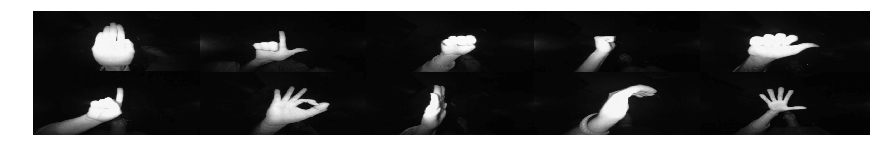

In [2]:
data, labels = load_DEMO()

In [3]:
print('Total number of images: ', data.shape[0])
print('Image size: ', data.shape[1], 'x', data.shape[1])

Total number of images:  1000
Image size:  120 x 120


### Shuffle test images

In [4]:
test_data, test_labels = shuffle(data, labels, random_state=0)

### One-hot label encoding

In [5]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(test_labels)
encoded_labels = encoder.transform(test_labels)
test_labels_onehot = np_utils.to_categorical(encoded_labels)

### Load trained model

In [6]:
my_CNN = load_model('my_CNN.h5',custom_objects={'top_2_accuracy': top_2_accuracy,\
                                                'top_3_accuracy': top_3_accuracy})

In [7]:
my_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 120, 120, 1)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 120, 120, 128)     1280      
_________________________________________________________________
gaussian_noise_19 (GaussianN (None, 120, 120, 128)     0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 120, 120, 128)     512       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 60, 60, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 60, 60, 64)        73792     
_________________________________________________________________
gaussian_noise_20 (GaussianN (None, 60, 60, 64)        0         
__________

### Evaluate on test set

In [8]:
loss, acc, top2, top3 = my_CNN.evaluate(test_data, test_labels_onehot, batch_size=64, verbose=0)

In [9]:
print('Test loss:', loss)
print('Test accuracy:', acc)
print('Top 2 accuracy:', top2)
print('Top 3 accuracy:', top3)

Test loss: 1.1848760395050049
Test accuracy: 0.8960000004768371
Top 2 accuracy: 0.9800000009536743
Top 3 accuracy: 0.9950000009536744


### Predict using test set

In [10]:
prediction = my_CNN.predict(test_data)

In [11]:
predicted = prediction.argmax(axis=1)
test_labels = test_labels.astype(int)

### Results

Found 896 correct labels


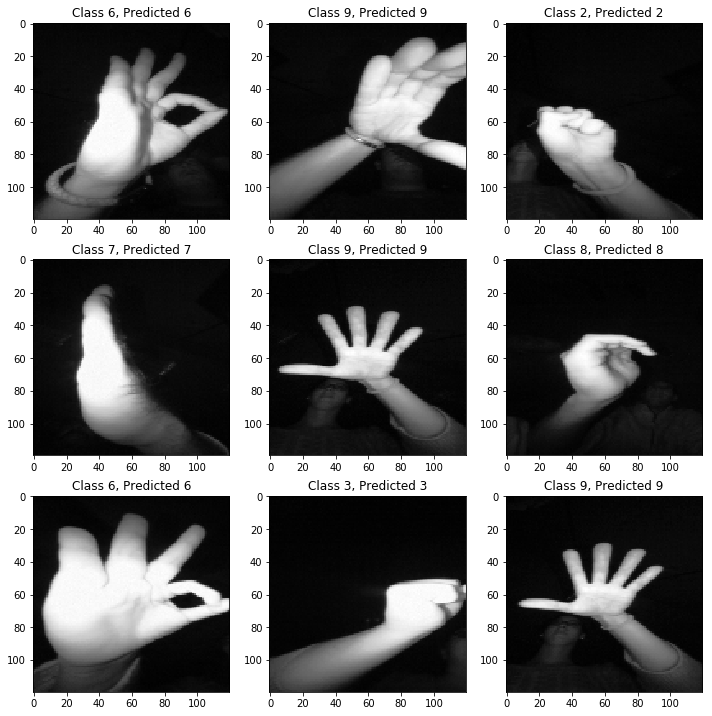

In [12]:
correct = np.where(predicted==test_labels)[0]
predicted_classes = np.argmax(np.round(prediction),axis=1)

show_correct_labels(correct, predicted_classes, test_data, test_labels)

In [13]:
incorrect = np.where(predicted_classes!=test_labels)[0]
show_incorrect_labels(incorrect, predicted_classes, test_data, test_labels)

Found 104 incorrect labels


In [14]:
confusion_matrix = metrics.confusion_matrix(y_true=test_labels, y_pred=predicted_classes)

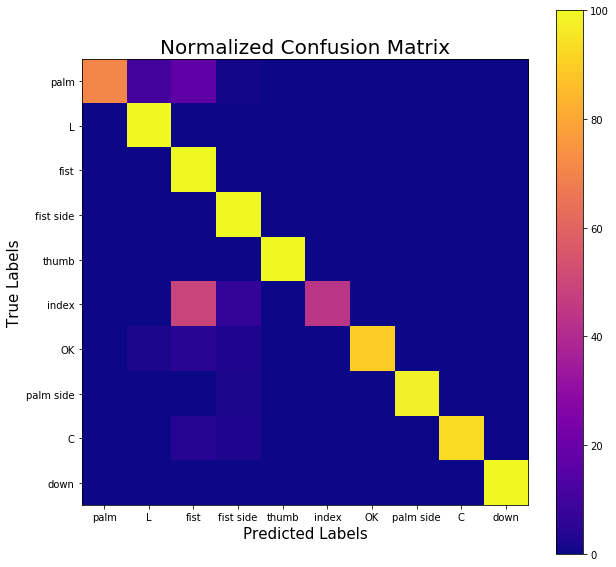

In [15]:
classes = {0: 'palm', 1: 'L', 2: 'fist', 3: 'fist side', 4: 'thumb', 5: 'index', 6: 'OK', \
           7: 'palm side', 8: 'C', 9: 'down'}
plot_conf_matrix(classes, confusion_matrix)

### Classification Report

In [16]:
target_names = list(classes.values())
print(classification_report(test_labels, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

        palm       1.00      0.71      0.83       100
           L       0.88      1.00      0.94       100
        fist       0.57      1.00      0.73       100
   fist side       0.86      1.00      0.93       100
       thumb       1.00      1.00      1.00       100
       index       1.00      0.44      0.61       100
          OK       1.00      0.90      0.95       100
   palm side       1.00      0.98      0.99       100
           C       1.00      0.93      0.96       100
        down       1.00      1.00      1.00       100

   micro avg       0.90      0.90      0.90      1000
   macro avg       0.93      0.90      0.89      1000
weighted avg       0.93      0.90      0.89      1000

